In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
vacc= pd.read_csv('/content/drive/MyDrive/country_vaccinations.csv')
vacc

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33720,Zimbabwe,ZWE,2021-07-22,2017101.0,1352514.0,664587.0,67629.0,50034.0,13.57,9.10,4.47,3366.0,"Sinopharm/Beijing, Sinovac, Sputnik V",Ministry of Health,https://twitter.com/MoHCCZim/status/1419767795...
33721,Zimbabwe,ZWE,2021-07-23,2072060.0,1400905.0,671155.0,54959.0,48617.0,13.94,9.43,4.52,3271.0,"Sinopharm/Beijing, Sinovac, Sputnik V",Ministry of Health,https://twitter.com/MoHCCZim/status/1419767795...
33722,Zimbabwe,ZWE,2021-07-24,2116664.0,1438890.0,677774.0,44604.0,49319.0,14.24,9.68,4.56,3318.0,"Sinopharm/Beijing, Sinovac, Sputnik V",Ministry of Health,https://twitter.com/MoHCCZim/status/1419767795...
33723,Zimbabwe,ZWE,2021-07-25,2127402.0,1447342.0,680060.0,10738.0,48838.0,14.31,9.74,4.58,3286.0,"Sinopharm/Beijing, Sinovac, Sputnik V",Ministry of Health,https://twitter.com/MoHCCZim/status/1419767795...


In [4]:
vacc.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [5]:
vacc.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
33720,Zimbabwe,ZWE,2021-07-22,2017101.0,1352514.0,664587.0,67629.0,50034.0,13.57,9.10,4.47,3366.0,"Sinopharm/Beijing, Sinovac, Sputnik V",Ministry of Health,https://twitter.com/MoHCCZim/status/1419767795...
33721,Zimbabwe,ZWE,2021-07-23,2072060.0,1400905.0,671155.0,54959.0,48617.0,13.94,9.43,4.52,3271.0,"Sinopharm/Beijing, Sinovac, Sputnik V",Ministry of Health,https://twitter.com/MoHCCZim/status/1419767795...
33722,Zimbabwe,ZWE,2021-07-24,2116664.0,1438890.0,677774.0,44604.0,49319.0,14.24,9.68,4.56,3318.0,"Sinopharm/Beijing, Sinovac, Sputnik V",Ministry of Health,https://twitter.com/MoHCCZim/status/1419767795...
33723,Zimbabwe,ZWE,2021-07-25,2127402.0,1447342.0,680060.0,10738.0,48838.0,14.31,9.74,4.58,3286.0,"Sinopharm/Beijing, Sinovac, Sputnik V",Ministry of Health,https://twitter.com/MoHCCZim/status/1419767795...
33724,Zimbabwe,ZWE,2021-07-26,2178709.0,1491493.0,687216.0,51307.0,50153.0,14.66,10.03,4.62,3374.0,"Sinopharm/Beijing, Sinovac, Sputnik V",Ministry of Health,https://twitter.com/MoHCCZim/status/1419767795...


In [6]:
vacc.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.874600e+04,1.787900e+04,1.505800e+04,1.544900e+04,3.346400e+04,18746.000000,17879.000000,15058.000000,33464.000000
mean,1.351367e+07,6.211962e+06,3.635993e+06,2.359468e+05,1.179531e+05,31.963971,20.481091,13.646440,3494.270171
std,7.562393e+07,2.277708e+07,1.312727e+07,1.277516e+06,8.497067e+05,37.038693,21.510236,16.999178,4575.530654
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.384602e+05,1.116510e+05,5.237050e+04,4.544000e+03,8.320000e+02,3.350000,2.760000,1.470000,425.000000
50%,9.848220e+05,7.061580e+05,4.022775e+05,2.226400e+04,6.444000e+03,16.595000,11.780000,6.310000,1974.000000
75%,4.775988e+06,3.162285e+06,1.876900e+06,9.946200e+04,3.663500e+04,49.627500,33.915000,20.047500,5242.250000
max,1.583361e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,232.720000,116.730000,115.990000,118759.000000


In [7]:
vacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33725 entries, 0 to 33724
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              33725 non-null  object 
 1   iso_code                             33725 non-null  object 
 2   date                                 33725 non-null  object 
 3   total_vaccinations                   18746 non-null  float64
 4   people_vaccinated                    17879 non-null  float64
 5   people_fully_vaccinated              15058 non-null  float64
 6   daily_vaccinations_raw               15449 non-null  float64
 7   daily_vaccinations                   33464 non-null  float64
 8   total_vaccinations_per_hundred       18746 non-null  float64
 9   people_vaccinated_per_hundred        17879 non-null  float64
 10  people_fully_vaccinated_per_hundred  15058 non-null  float64
 11  daily_vaccinations_per_milli

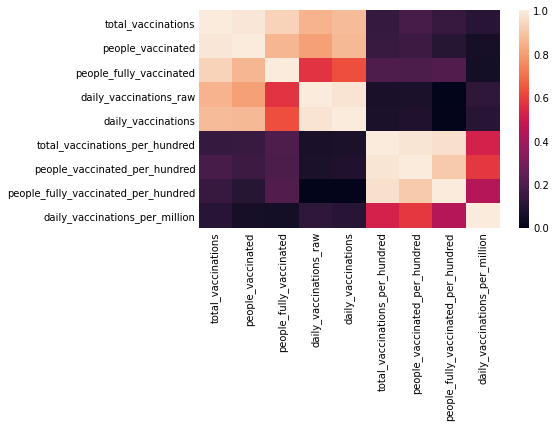

In [8]:
sns.heatmap(vacc.corr())

In [9]:
## Sample Mean
vacc['people_fully_vaccinated_per_hundred'].isna()

0         True
1         True
2         True
3         True
4         True
         ...  
33720    False
33721    False
33722    False
33723    False
33724    False
Name: people_fully_vaccinated_per_hundred, Length: 33725, dtype: bool

In [10]:
df=vacc['people_fully_vaccinated_per_hundred'].dropna()
df

78       0.14
87       0.20
91       0.25
93       0.29
94       0.29
         ... 
33720    4.47
33721    4.52
33722    4.56
33723    4.58
33724    4.62
Name: people_fully_vaccinated_per_hundred, Length: 15058, dtype: float64

In [11]:
sum(i for i in df)/ len(df)

13.646439766237183

In [12]:
x_mean= np.mean(df)
x_mean

13.646439766237183

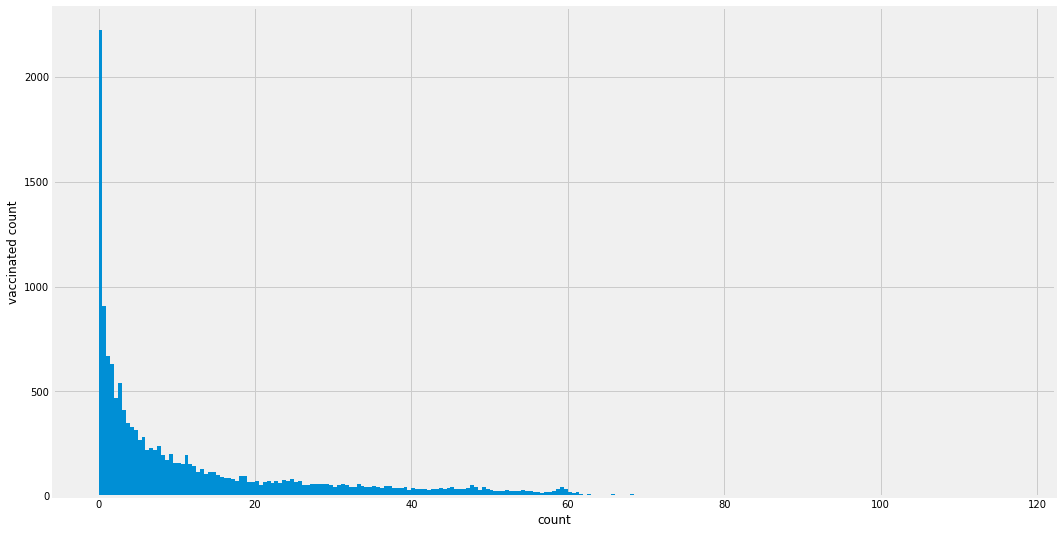

In [13]:
def histo():
  bin_edges = np.arange(0, df.max() + 1, 0.5)
  plt.figure(figsize=(16,9))
  fig = plt.hist(df, bins=bin_edges)
  plt.xlabel('count')
  plt.ylabel('vaccinated count')
    
    
histo()

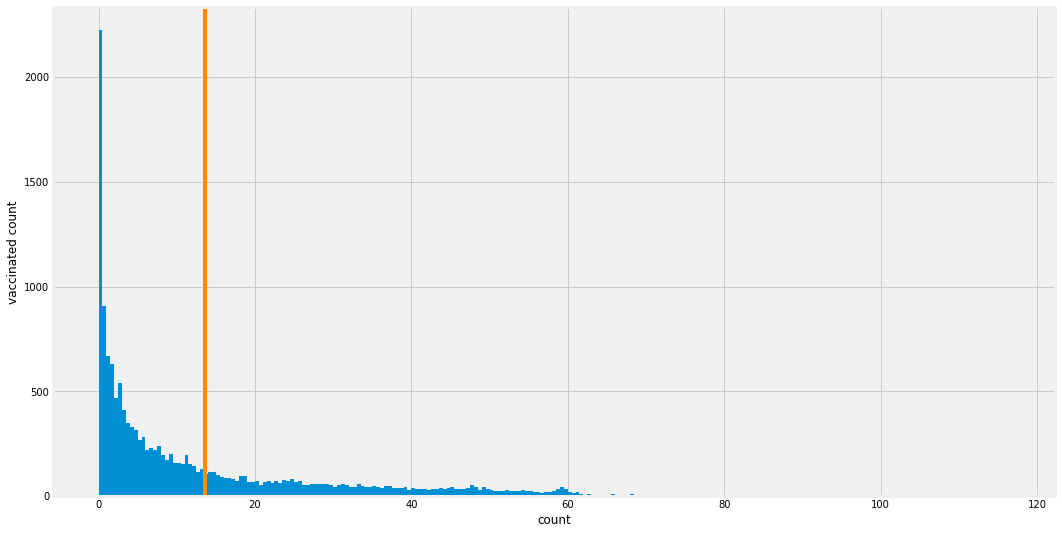

In [14]:
histo()
plt.axvline(x_mean, color='darkorange')
plt.show()

In [15]:
## Variance
sum([(i - x_mean)**2 for i in df]) / (len(df) - 1)


288.9720415245963

In [16]:
var= np.var(df, ddof=1)
var

288.9720415245963

In [17]:
df.var()

288.9720415245963

In [18]:
## Stardard Deviation
((sum([(i - x_mean)**2 for i in df]) / (len(df) - 1)) ** 0.5)

16.99917767201097

In [19]:
np.sqrt(np.var(df, ddof=1))

16.99917767201097

In [20]:
df.std()

16.99917767201097

In [21]:
np.min(df)

0.0

In [22]:
np.max(df)

115.99

In [23]:
## Mode

In [24]:
lst = list(df !=0)
mode = max(set(df), key=lst.count)
mode

1.0

In [25]:
lst.count(mode)

14678

In [26]:
stats.mode(df)

ModeResult(mode=array([0.]), count=array([380]))

In [26]:
## Median

In [27]:
x=np.sort(df)
tmp = round(0.5 * x.shape[0])

if x.shape[0] % 2:
    median = x[tmp - 1]
else:
    median = x[tmp - 1] + (x[tmp] - x[tmp - 1]) / 2.
    
median

6.31

In [28]:
np.median(x)

6.31

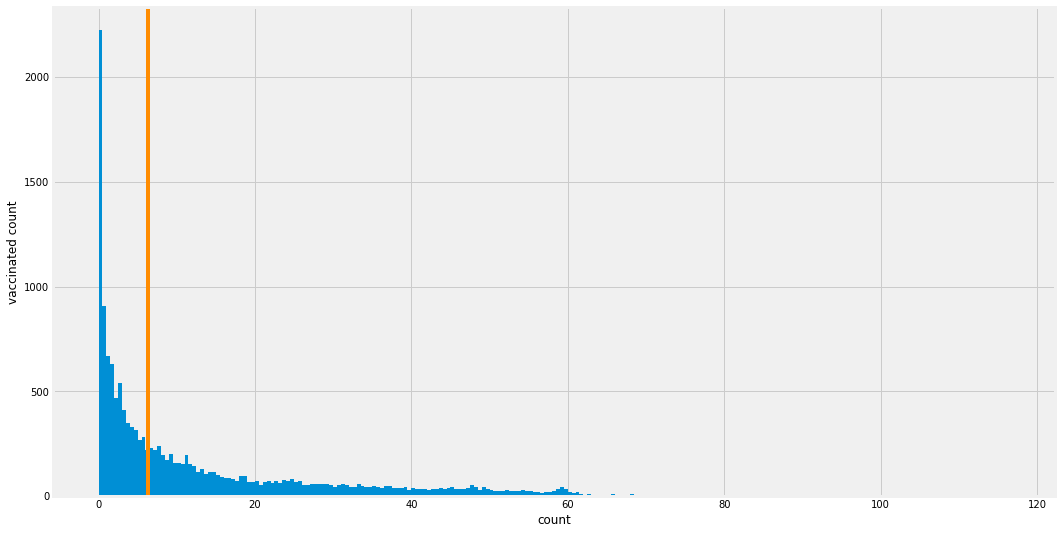

In [29]:
histo()
plt.axvline(median, color='darkorange')
plt.show()

Mean < Mode So graph is right skewed
